In [ ]:
import pickle
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score,make_scorer
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/KHMT0119/Đồ Án KHMT0119/Đồ Án Tốt Nghiệp/Data DA/VNNV_Pyvi.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(path)
df

,Text,Label
0,ban quản_lý dự_án oda thành_phố thơ tết nguyên...,Chính trị Xã hội
1,luật lao_động thành_phố thơ tổ_chức gắn biển c...,Chính trị Xã hội
2,chiều nguyễn đình chiểu thường_trực hội_đồng n...,Chính trị Xã hội
3,sở lao_động thương_binh xã_hội thành_phố thơ p...,Chính trị Xã hội
4,vĩnh_thạnh đầu ủy đảng huyện quan_tâm lãnh_đạo...,Chính trị Xã hội
...,...,...
14498,hôm_qua hà nội phòng cảnh_sát phòng_chống tội_...,Pháp luật
14499,tình_hình giá_cả mặt_hàng lương_thực thực_phẩm...,Pháp luật
14500,thông_tin công_an nguyễn trí sinh tạm giam cáo...,Pháp luật
14501,hôm_qua ngày_tháng công_an thành_phố long xuyê...,Pháp luật


## Count

In [ ]:
data = pd.read_csv(path)

In [ ]:
# Xác định tất cả các giá trị duy nhất trong cột lớp
unique_classes = data['Label'].unique()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80-20%
train_data, test_data = train_test_split(data, stratify=data['Label'], train_size=0.8, test_size=0.2)

# Xác định số lượng mẫu của mỗi lớp trong tập huấn luyện
train_counts = train_data['Label'].value_counts()

# Xác định số lượng mẫu của mỗi lớp trong tập kiểm tra
test_counts = test_data['Label'].value_counts()

# In ra số lượng mẫu của mỗi lớp trong tập huấn luyện
for cls in unique_classes:
    train_count = train_counts.get(cls, 0)
    test_count = test_counts.get(cls, 0)
    print(f"Lớp '{cls}': Số lượng mẫu trong tập huấn luyện: {train_count}, Số lượng mẫu trong tập kiểm tra: {test_count}")


Lớp 'Chính trị Xã hội': Số lượng mẫu trong tập huấn luyện: 1165, Số lượng mẫu trong tập kiểm tra: 292
Lớp 'Thế giới': Số lượng mẫu trong tập huấn luyện: 1084, Số lượng mẫu trong tập kiểm tra: 271
Lớp 'Thể thao': Số lượng mẫu trong tập huấn luyện: 1050, Số lượng mẫu trong tập kiểm tra: 263
Lớp 'Kinh tế': Số lượng mẫu trong tập huấn luyện: 1046, Số lượng mẫu trong tập kiểm tra: 262
Lớp 'Sức khỏe': Số lượng mẫu trong tập huấn luyện: 1050, Số lượng mẫu trong tập kiểm tra: 262
Lớp 'Văn hóa': Số lượng mẫu trong tập huấn luyện: 1097, Số lượng mẫu trong tập kiểm tra: 274
Lớp 'Dự báo thời tiết': Số lượng mẫu trong tập huấn luyện: 1055, Số lượng mẫu trong tập kiểm tra: 264
Lớp 'Giáo dục': Số lượng mẫu trong tập huấn luyện: 905, Số lượng mẫu trong tập kiểm tra: 226
Lớp 'Môi trường': Số lượng mẫu trong tập huấn luyện: 933, Số lượng mẫu trong tập kiểm tra: 233
Lớp 'Nông nghiệp': Số lượng mẫu trong tập huấn luyện: 1123, Số lượng mẫu trong tập kiểm tra: 281
Lớp 'Pháp luật': Số lượng mẫu trong tập huấ

In [ ]:
# Xác định tất cả các giá trị duy nhất trong cột lớp
unique_classes = data['Label'].unique()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80-20%
train_data, test_data = train_test_split(data, stratify=data['Label'], train_size=0.8, test_size=0.2)

# Xác định số lượng mẫu của mỗi lớp trong tập dữ liệu gốc
total_counts = data['Label'].value_counts()

# Xác định số lượng mẫu của mỗi lớp trong tập huấn luyện và tập kiểm tra
train_counts = train_data['Label'].value_counts()
test_counts = test_data['Label'].value_counts()

# Tính phần trăm mỗi lớp chiếm trong tập dữ liệu gốc
total_samples = len(data)
class_percentages = (total_counts / total_samples) * 100

# In ra phần trăm mỗi lớp chiếm trong tập dữ liệu
for cls in unique_classes:
    percentage = class_percentages.get(cls, 0)
    print(f"Lớp '{cls}': Chiếm {percentage:.2f}% trong tập dữ liệu gốc.")


Lớp 'Chính trị Xã hội': Chiếm 10.05% trong tập dữ liệu gốc.
Lớp 'Thế giới': Chiếm 9.34% trong tập dữ liệu gốc.
Lớp 'Thể thao': Chiếm 9.05% trong tập dữ liệu gốc.
Lớp 'Kinh tế': Chiếm 9.02% trong tập dữ liệu gốc.
Lớp 'Sức khỏe': Chiếm 9.05% trong tập dữ liệu gốc.
Lớp 'Văn hóa': Chiếm 9.45% trong tập dữ liệu gốc.
Lớp 'Dự báo thời tiết': Chiếm 9.09% trong tập dữ liệu gốc.
Lớp 'Giáo dục': Chiếm 7.80% trong tập dữ liệu gốc.
Lớp 'Môi trường': Chiếm 8.04% trong tập dữ liệu gốc.
Lớp 'Nông nghiệp': Chiếm 9.68% trong tập dữ liệu gốc.
Lớp 'Pháp luật': Chiếm 9.43% trong tập dữ liệu gốc.


# Train - Test

In [ ]:
X = df['Text']
y = df['Label']

In [ ]:
# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In thông tin về số lượng mẫu trong mỗi tập
print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 11602 samples
Test set size: 2901 samples


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_n = encoder.fit_transform(y_train)
y_test_n = encoder.fit_transform(y_test)

taget_name = encoder.classes_

In [ ]:
print(taget_name)

['Chính trị Xã hội' 'Dự báo thời tiết' 'Giáo dục' 'Kinh tế' 'Môi trường'
 'Nông nghiệp' 'Pháp luật' 'Sức khỏe' 'Thế giới' 'Thể thao' 'Văn hóa']


# TF-IDF N-gram(1,1)

In [ ]:
tfidf_vect_1 = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
tfidf_vect_1.fit(X_train)

X_train_tfidf_1 =  tfidf_vect_1.transform(X_train)
X_test_tfidf_1 =  tfidf_vect_1.transform(X_test)

In [ ]:
print("Vector hoá tập Train TF-IDF ",X_train_tfidf_1.data)
print("------------------")
print("Kích thước vector ",X_train_tfidf_1.shape)

Vector hoá tập Train TF-IDF  [0.03599166 0.06882409 0.16476538 ... 0.08513395 0.03322269 0.05699988]
------------------
Kích thước vector  (11602, 31953)


In [ ]:
print("Vector hoá tập Train TF-IDF ",X_test_tfidf_1.data)
print("------------------")
print("Kích thước vector ",X_test_tfidf_1.shape)

Vector hoá tập Train TF-IDF  [0.11092995 0.03989242 0.05158683 ... 0.1984696  0.39636539 0.17985815]
------------------
Kích thước vector  (2901, 31953)


##SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_train_tfidf_1)

X_train_tfidf_svd_1 = svd.transform(X_train_tfidf_1)
X_test_tfidf_svd_1 = svd.transform(X_test_tfidf_1)

In [ ]:
print("Vector hoá tập Train SVD TF-IDF ",X_train_tfidf_svd_1.data)
print("------------------")
print("Kích thước vector ",X_train_tfidf_svd_1.shape)

Vector hoá tập Train SVD TF-IDF  <memory at 0x7caa03756670>
------------------
Kích thước vector  (11602, 300)


In [ ]:
print("Vector hoá tập Test SVD TF-IDF ",X_test_tfidf_svd_1.data)
print("------------------")
print("Kích thước vector ",X_test_tfidf_svd_1.shape)

Vector hoá tập Test SVD TF-IDF  <memory at 0x7caa03756670>
------------------
Kích thước vector  (2901, 300)


# SVM

## GirdSearch SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 0.01, 0.001],
              'kernel': ['rbf','poly']}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(SVC(), param_grid, cv=kf, refit=True, verbose=3)
grid_search.fit(X_train_tfidf_svd_1, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=  40.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=  34.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=  33.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=  35.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=  34.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.093 total time=  29.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.089 total time=  31.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.089 total time=  30.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.096 total time=  29.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.086 total time=  29.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=  18.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [ ]:
# In ra kết quả tốt nhất
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1-Score: {grid_search.best_score_}")

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best F1-Score: 0.8951893506069025


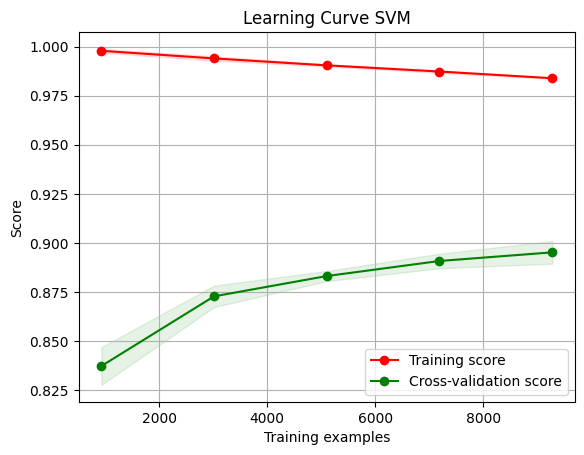

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Hàm vẽ learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

    # Thực hiện vẽ learning curve
plot_learning_curve(grid_search.best_estimator_, "Learning Curve SVM", X_train_tfidf_svd_1, y_train, cv=kf, n_jobs=-1)

plt.show()

## Top 3 Param SVM

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix SVM')
    plt.colorbar()
    tick_marks = range(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np

results = grid_search.cv_results_

params_scores = list(zip(results['params'], results['mean_test_score']))

params_scores.sort(key=lambda x: x[1], reverse=True)

top_3_best_params = [params for params, _ in params_scores[:3]]

In [ ]:
top_3_best_params

[{'C': 10, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}]

Training with params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.92      0.89      0.91       300
Dự báo thời tiết       0.99      1.00      0.99       263
        Giáo dục       0.89      0.90      0.89       229
         Kinh tế       0.90      0.91      0.91       252
      Môi trường       0.87      0.90      0.89       244
     Nông nghiệp       0.94      0.92      0.93       292
       Pháp luật       0.86      0.90      0.88       254
        Sức khỏe       0.90      0.88      0.89       248
        Thế giới       0.92      0.88      0.90       273
        Thể thao       0.96      0.97      0.96       267
         Văn hóa       0.83      0.82      0.83       279

        accuracy                           0.91      2901
       macro avg       0.91      0.91      0.91      2901
    weighted avg       0.91      0.91      0.91      2901



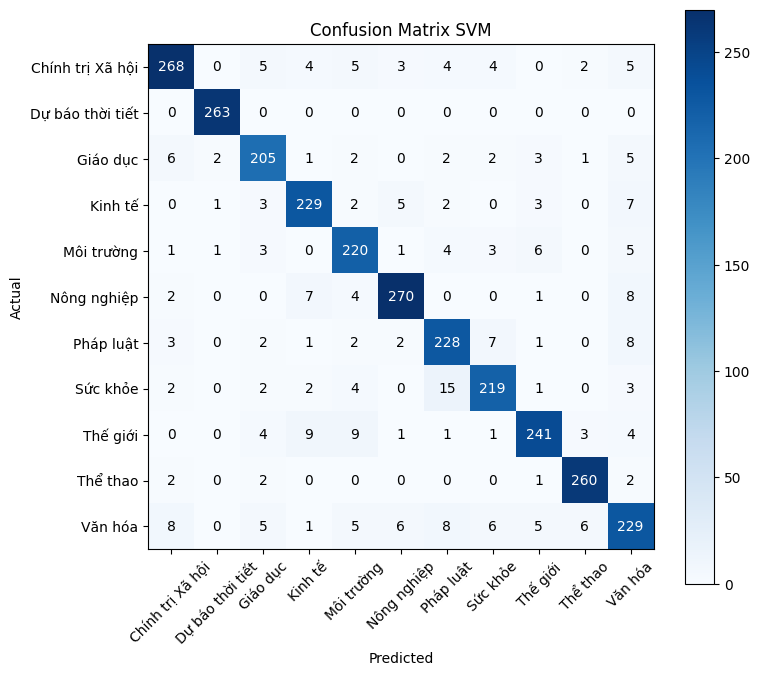

Training with params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.92      0.87      0.89       300
Dự báo thời tiết       0.99      1.00      1.00       263
        Giáo dục       0.92      0.88      0.90       229
         Kinh tế       0.90      0.87      0.89       252
      Môi trường       0.84      0.91      0.88       244
     Nông nghiệp       0.91      0.92      0.92       292
       Pháp luật       0.85      0.90      0.88       254
        Sức khỏe       0.88      0.85      0.86       248
        Thế giới       0.87      0.86      0.86       273
        Thể thao       0.94      0.96      0.95       267
         Văn hóa       0.81      0.81      0.81       279

        accuracy                           0.89      2901
       macro avg       0.89      0.89      0.89      2901
    weighted avg       0.89      0.89      0.89      2901



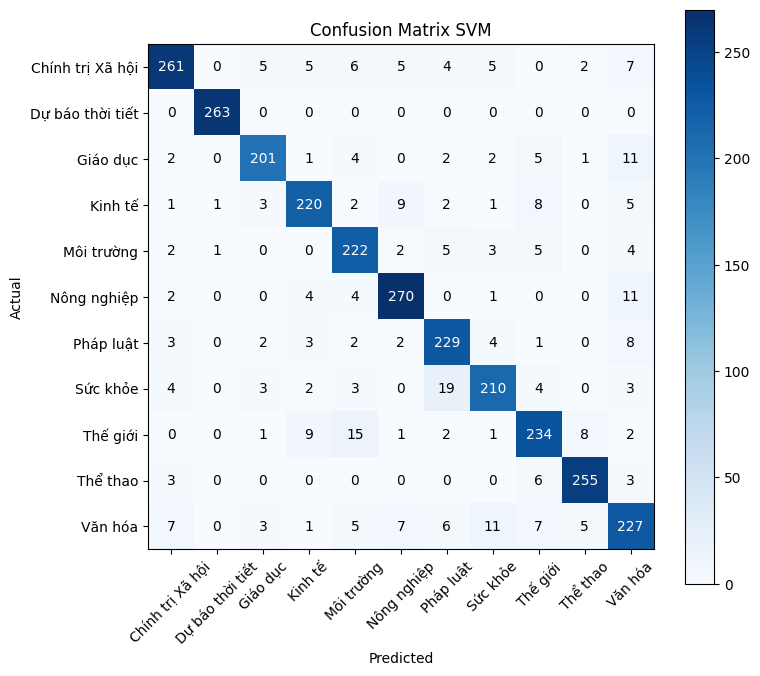

Training with params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.93      0.87      0.90       300
Dự báo thời tiết       0.99      1.00      0.99       263
        Giáo dục       0.93      0.88      0.91       229
         Kinh tế       0.90      0.87      0.89       252
      Môi trường       0.85      0.91      0.88       244
     Nông nghiệp       0.90      0.93      0.92       292
       Pháp luật       0.85      0.91      0.88       254
        Sức khỏe       0.88      0.86      0.87       248
        Thế giới       0.87      0.88      0.87       273
        Thể thao       0.95      0.96      0.95       267
         Văn hóa       0.82      0.81      0.82       279

        accuracy                           0.90      2901
       macro avg       0.90      0.90      0.90      2901
    weighted avg       0.90      0.90      0.90      2901



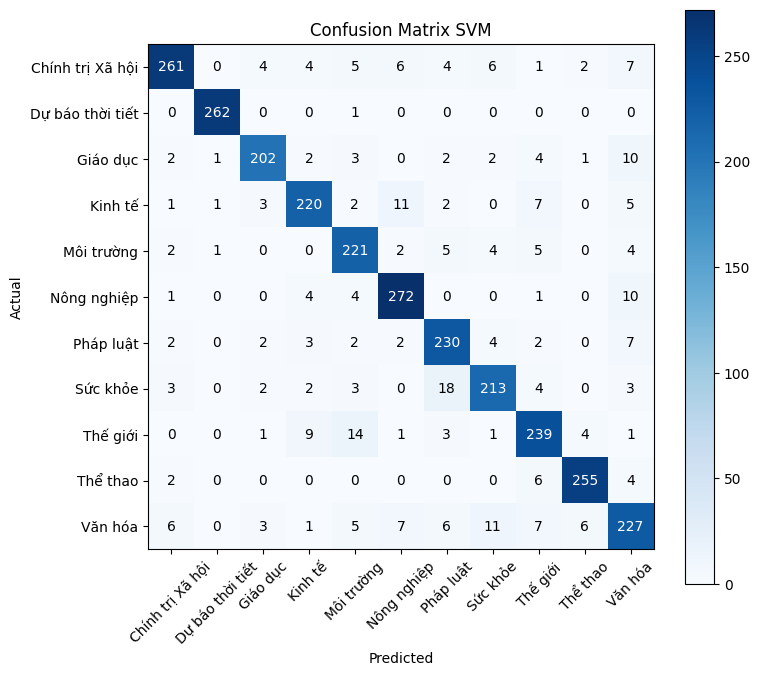

In [ ]:
for params in top_3_best_params:
    print("Training with params:", params)

    SVM = SVC(probability=True, **params, decision_function_shape='ovr')
    SVM.fit(X_train_tfidf_svd_1, y_train_n)

    y_pred = SVM.predict(X_test_tfidf_svd_1)

    cr = classification_report(y_test_n, y_pred, target_names = taget_name)
    print(cr)
    plot_confusion_matrix(y_test_n, y_pred, taget_name)

## SVM Model

In [ ]:
#Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best_params = grid_search.best_params_

# Tạo mô hình SVM với bộ siêu tham số tốt nhất
SVM1 = SVC(probability=True, **best_params, decision_function_shape='ovr')

SVM1.fit(X_train_tfidf_svd_1, y_train_n)

y_pred = SVM1.predict(X_test_tfidf_svd_1)

In [ ]:
# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test_n, y_pred)
f1 = f1_score(y_test_n, y_pred, average='weighted')

# In ra kết quả đánh giá
print(f"Accuracy on test set: {accuracy}")
print(f"F1-score on test set: {f1}")

Accuracy on test set: 0.9072733540158566
F1-score on test set: 0.907197390987355


In [ ]:
a= classification_report(y_test_n, y_pred, target_names = taget_name)
print(a)

In [ ]:
plot_confusion_matrix(y_test, y_pred, taget_name)

# KNN

## GirdSearch CV KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Định nghĩa lưới các giá trị siêu tham số để thử
param_grid = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
     'p': [1, 2] # 1 = manhattan, 2 = euclidean
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Định nghĩa các metric mà bạn muốn sử dụng
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf, refit=True, verbose=3)
grid_search.fit(X_train_tfidf_svd_1, y_train)

# In ra kết quả tốt nhất
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1-Score: {grid_search.best_score_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.793 total time=  18.8s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.793 total time=  15.3s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.791 total time=   7.9s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.787 total time=  11.2s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.803 total time=   7.9s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.793 total time=  11.2s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.793 total time=   7.9s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.791 total time=  11.2s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.787 total time=   7.8s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.803 total time=  11.6s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.812 total time=   0.7s
[CV 2/5] END n_neighbors=1, p=2

In [ ]:
import numpy as np

results = grid_search.cv_results_

params_scores = list(zip(results['params'], results['mean_test_score']))

params_scores.sort(key=lambda x: x[1], reverse=True)

top_3_best_params = [params for params, _ in params_scores[:3]]

## Top 3 param KNN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix KNN')
    plt.colorbar()
    tick_marks = range(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.tight_layout()
    plt.show()

Training with params: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.86      0.72      0.78       300
Dự báo thời tiết       0.98      0.99      0.98       263
        Giáo dục       0.79      0.85      0.82       229
         Kinh tế       0.87      0.85      0.86       252
      Môi trường       0.82      0.78      0.80       244
     Nông nghiệp       0.89      0.84      0.86       292
       Pháp luật       0.81      0.81      0.81       254
        Sức khỏe       0.87      0.81      0.84       248
        Thế giới       0.78      0.81      0.79       273
        Thể thao       0.85      0.93      0.89       267
         Văn hóa       0.61      0.73      0.66       279

        accuracy                           0.83      2901
       macro avg       0.83      0.83      0.83      2901
    weighted avg       0.83      0.83      0.83      2901



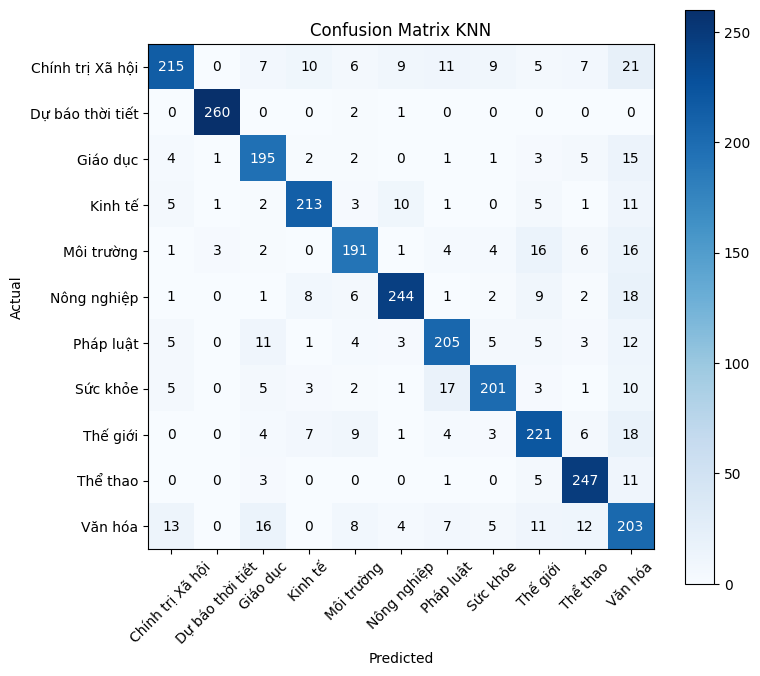

Training with params: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.86      0.69      0.77       300
Dự báo thời tiết       0.98      0.99      0.98       263
        Giáo dục       0.77      0.87      0.81       229
         Kinh tế       0.89      0.83      0.85       252
      Môi trường       0.83      0.79      0.81       244
     Nông nghiệp       0.89      0.86      0.87       292
       Pháp luật       0.82      0.80      0.81       254
        Sức khỏe       0.87      0.81      0.84       248
        Thế giới       0.78      0.84      0.81       273
        Thể thao       0.88      0.92      0.90       267
         Văn hóa       0.63      0.76      0.69       279

        accuracy                           0.83      2901
       macro avg       0.84      0.83      0.83      2901
    weighted avg       0.84      0.83      0.83      2901



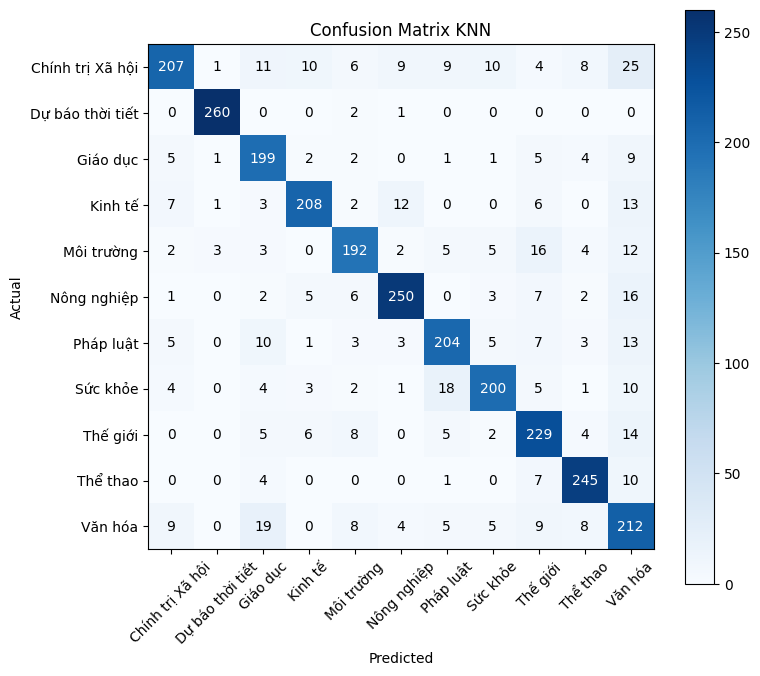

Training with params: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
                  precision    recall  f1-score   support

Chính trị Xã hội       0.88      0.74      0.80       300
Dự báo thời tiết       0.98      0.99      0.99       263
        Giáo dục       0.80      0.86      0.83       229
         Kinh tế       0.86      0.85      0.86       252
      Môi trường       0.81      0.77      0.79       244
     Nông nghiệp       0.87      0.84      0.85       292
       Pháp luật       0.83      0.80      0.82       254
        Sức khỏe       0.85      0.82      0.84       248
        Thế giới       0.75      0.80      0.78       273
        Thể thao       0.84      0.93      0.88       267
         Văn hóa       0.67      0.73      0.70       279

        accuracy                           0.83      2901
       macro avg       0.83      0.83      0.83      2901
    weighted avg       0.83      0.83      0.83      2901



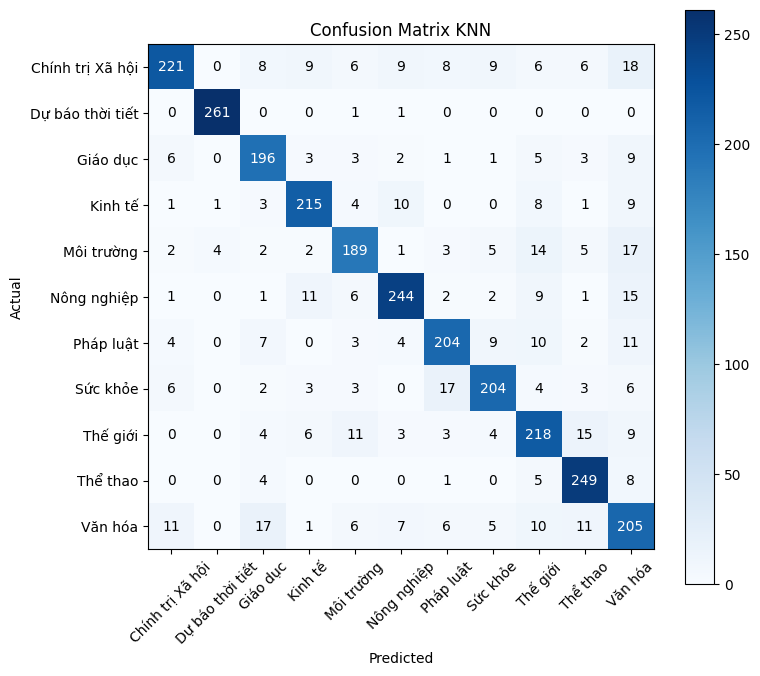

In [ ]:
# Huấn luyện và kiểm tra với top 3 best_params
for params in top_3_best_params:

    print("Training with params:", params)
    KNN = KNeighborsClassifier(**params)

    KNN.fit(X_train_tfidf_svd_1, y_train_n)

    y_pred = KNN.predict(X_test_tfidf_svd_1)

    cr = classification_report(y_test_n, y_pred, target_names = taget_name)
    print(cr)
    plot_confusion_matrix(y_test_n, y_pred, taget_name)

#-----------------------------

#  lazypredict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier #CLassification

In [ ]:
# fit all models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_tfidf_svd_1, X_test_tfidf_svd_1, y_train, y_test)

 97%|█████████▋| 28/29 [07:55<00:09,  9.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 11602, number of used features: 300
[LightGBM] [Info] Start training from score -2.305347
[LightGBM] [Info] Start training from score -2.396689
[LightGBM] [Info] Start training from score -2.554318
[LightGBM] [Info] Start training from score -2.396689
[LightGBM] [Info] Start training from score -2.532388
[LightGBM] [Info] Start training from score -2.345017
[LightGBM] [Info] Start training from score -2.344118
[LightGBM] [Info] Start training from score -2.389142
[LightGBM] [Info] Start training from score -2.372366
[LightGBM] [Info] Start training from score -2.406204
[LightGBM] [Info] Start training from score -2.363167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [09:15<00:00, 19.14s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.90,0.90,None,0.90,32.92
CalibratedClassifierCV,0.89,0.89,None,0.89,149.30
LinearSVC,0.89,0.89,None,0.89,35.29
LGBMClassifier,0.89,0.89,None,0.89,79.90
RidgeClassifierCV,0.88,0.88,None,0.88,0.94
RidgeClassifier,0.88,0.88,None,0.88,0.33
NuSVC,0.88,0.88,None,0.88,48.89
NearestCentroid,0.88,0.88,None,0.88,0.40
LogisticRegression,0.88,0.88,None,0.88,3.04


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(models, *[[['Accuracy', 'Balanced Accuracy'], ['Balanced Accuracy', 'F1 Score'], ['F1 Score', 'Time Taken']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Balanced Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'F1 Score', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'count()', None], **{})
chart

In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.90,0.90,None,0.90,32.92
CalibratedClassifierCV,0.89,0.89,None,0.89,149.30
LinearSVC,0.89,0.89,None,0.89,35.29
LGBMClassifier,0.89,0.89,None,0.89,79.90
RidgeClassifierCV,0.88,0.88,None,0.88,0.94
RidgeClassifier,0.88,0.88,None,0.88,0.33
NuSVC,0.88,0.88,None,0.88,48.89
NearestCentroid,0.88,0.88,None,0.88,0.40
LogisticRegression,0.88,0.88,None,0.88,3.04


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(models, *[[['Accuracy', 'Balanced Accuracy'], ['Balanced Accuracy', 'F1 Score'], ['F1 Score', 'Time Taken']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Balanced Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'F1 Score', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'count()', None], **{})
chart

In [ ]:
import openai
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# pytest main.py --cov

"""
scrapeToGPT.py
====================================
The core module of my cover letter generation project
"""


def urlScrape(url):
    """
    Boots up a chrome browser window and logs in. With your credentials.

    Parameters
    ----------
    url
        Your typical www.linkin.com/... url of a typical job post. It needs your linkedin username and password.
    """
    options = Options()
    options.add_argument("start-maximized")
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()), options=options
    )

    driver.get("https://www.linkedin.com/login")
    time.sleep(2)
    username = driver.find_element(By.ID, "username")
    username.send_keys("")
    pword = driver.find_element(By.ID, "password")
    pword.send_keys("")
    driver.find_element(By.XPATH, "//button[@type='submit']").click()

    driver.get(url)
    time.sleep(3)
    src = driver.page_source
    html = BeautifulSoup(src, "html.parser")

    return descScrape(html)


def descScrape(html):
    """
    Webscrapes the html description of the LinkedIn url of a job posting.

    Parameters
    ----------
    html
        The html scraped from the urlScrape function automatically goes here.
    """
    # print(html.prettify())
    company_name_html = html.find_all("a", {"class": "ember-view t-black t-normal"})
    company_name = (
        company_name_html[0].text
    ).strip()  # if there is an error here it means you need to input your linkedin user email and password in the urlScrape Function

    company_desc_html = html.find_all("div", {"class": "jobs-description"})

    company_desc = (company_desc_html[0].text).strip()
    # print(company_desc)

    info = company_name + ". Here is the relevant job description. " + company_desc
    return info


# def pull templateCoverLetter or Prompt():


def completionQuery(desc):
    """
    Takes the description and combines it with a preset query to send to openAI.

    Parameters
    ----------
    desc
        Description from the html of descScrape is automatically put in here. You must also enter your openAI api key.
    """
    openai.api_key = "sk-OUI2dEo9tjcu]m6IgNthT3BlbkFJgII5 uSYrI03EZWYZGNHi"

    # pull templateCoverLetterHere
    # cap completion to 10tokens
    prompt = (
        "Write a genuine and human three paragraph cover letter for the position of software developer to the company "
        + desc
        + ". I have an interest in the company's mission, which you should explicitly find out. Align with key facts about me below. I'm a recent graduate of Columbia University who studied computer science. Additional key facts to include are: 1: I have experience in open source development, both maintaining and contributing to GitHub projects. This has brought me up to the industry's best practices. 2: My previous internship in a startup has trained me to learn and adapt quickly. 3: During my personal project in cofounding a logistics centralization app for my university, I have learned to work alongside colleagues, both technical and laypersons. Sign off with the name \"Jaesung Park\"."
    )
    print("Prompt:")
    print(prompt)
    completion = openai.Completion.create(
        model="text-davinci-003", prompt=prompt, max_tokens=1500, temperature=0.6
    )
    print(completion.choices[0].text)
    return True


url = "https://www.linkedin.com/jobs/view/jr-mid-level-software-engineer-roku-remote-at-tandym-group-3555277192/?utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic"
# completionQuery(urlScrape(url))
# print(urlScrape(url))

ModuleNotFoundError: ignored